In [0]:
!wget -nc 140.114.76.113:8000/pA1.csv
!wget -nc 140.114.76.113:8000/pA2.csv

--2019-12-07 01:56:40--  http://140.114.76.113:8000/pA1.csv
Connecting to 140.114.76.113:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604 [text/csv]
Saving to: ‘pA1.csv’

pA1.csv             100%[===================>]     604  --.-KB/s    in 0s      

2019-12-07 01:56:40 (131 MB/s) - ‘pA1.csv’ saved [604/604]

--2019-12-07 01:56:45--  http://140.114.76.113:8000/pA2.csv
Connecting to 140.114.76.113:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631 [text/csv]
Saving to: ‘pA2.csv’

pA2.csv             100%[===================>]     631  --.-KB/s    in 0s      

2019-12-07 01:56:45 (115 MB/s) - ‘pA2.csv’ saved [631/631]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [0]:
seed = 999
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [0]:
# A1

In [0]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs + self.b
        return ps


data = Data('./pA1.csv')
loader = DataLoader(data, batch_size=5)

device = 'cpu'
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'a': [],
    'b': []
}

for epoch in range(50):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model(xs)
        loss = criterion(ps, ys)
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.detach().item())
        history['a'].append(model.a.item())
        history['b'].append(model.b.item())

print('a:', model.a[0])
print('b:', model.b[0])

a: tensor(5.0248, grad_fn=<SelectBackward>)
b: tensor(3.9738, grad_fn=<SelectBackward>)


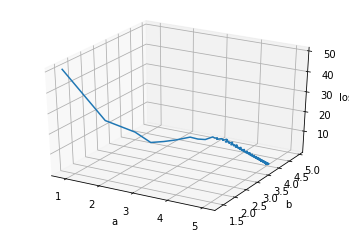

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
z = history['loss']
x = history['a']
y = history['b']
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.plot(x, y, z)
plt.show()

In [0]:
# A2

In [0]:
from torch.autograd import Variable
from torch import Tensor

class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Linear(2, 1)
    
    def forward(self, xs):
        y_pred = self.model(xs)
        return y_pred


data = Data('./pA2.csv')
loader = DataLoader(data, batch_size=1)

device = 'cpu'
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'w0': [],
    'w1': [],
    'w2': []
}

for epoch in range(50):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        xs = torch.tensor([xs**2, xs])
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model(xs)
        loss = criterion(ps, ys)
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.detach().item())

print('w0, w1:', model.model.weight[0])
print('w2:', model.model.bias[0])

w0, w1: tensor([-1.8526,  0.9711], grad_fn=<SelectBackward>)
w2: tensor(4.0023, grad_fn=<SelectBackward>)


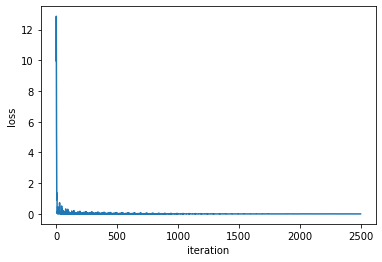

In [0]:
plt.plot(history['loss'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()